# Plotting

The plotting functionality of `xyzpy` is oriented towards quickly getting an
overview of high-dimensional gridded data.

:::{hint}
There are many other libraries for plotting self-labelled data, especially
for {class}`pandas.DataFrame` objects, which can easily be generated
from a {class}`xarray.Dataset` using e.g.:

```python
ds = harvester.full_ds
df = ds.to_dataframe().reset_index()
```
Notably:

- [xarray](http://xarray.pydata.org/en/stable/plotting.html) itself has plotting functionality
- [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) itself has plotting functionality
- [seaborn](https://seaborn.pydata.org/) uses `matlotlib` for plotting dataframes
- [holoviews](https://holoviews.org/) uses `bokeh` for plotting dataframes
- [hvplot](https://hvplot.holoviz.org/) builds on `holoviews` for plotting datasets
- [altair](https://altair-viz.github.io/) for dataframes

To name but a few.
:::

Specifically, `xyzpy` provides a simple single method interface (with
autocorrected kwargs), that allows the dimensions/coordinates to be encoded
to the following properties in a line plot:

- `x`: x-axis
- `y`: y-axis - the target quantity, if not supplied bin the data over x
- `col`: subplot column
- `row`: subplot row
- `color`: color of the line
- `hue` : if supplied as well as color, this controls hue, and `color` intensity
- `marker`: marker type
- `markersize`: marker size
- `markeredgecolor`: color of the marker edge
- `linestyle`: line style
- `linewidth`: line width
- `text`: text label next to each point

Multiple dimensions can also be stacked and mapped to the same property using a tuple or list. Or if the supplied option is not a coordinate of the dataset, it is assumed to be global value for that property.




* aggregation
* heatmap
* histogram


misc notes

* join_across_missing

In [1]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np

import xyzpy as xyz


def singuass(x, a, l, phi):
    return np.sin(x / l - phi) * np.exp(-(x**2) / a)


r = xyz.Runner(singuass, "sg(x)")

combos = {
    "x": np.linspace(-4, 4, 52),
    "a": [1, 2, 3],
    "l": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    "phi": [0, 1],
}

ds = r.run_combos(combos)
ds

100%|##########| 1872/1872 [00:00<00:00, 726945.38it/s]


<xarray.Dataset>
Dimensions:  (x: 52, a: 3, l: 6, phi: 2)
Coordinates:
  * x        (x) float64 -4.0 -3.843 -3.686 -3.529 ... 3.529 3.686 3.843 4.0
  * a        (a) int64 1 2 3
  * l        (l) float64 0.2 0.3 0.4 0.5 0.6 0.7
  * phi      (phi) int64 0 1
Data variables:
    sg(x)    (x, a, l, phi) float64 -1.027e-07 -9.415e-08 ... -0.004828

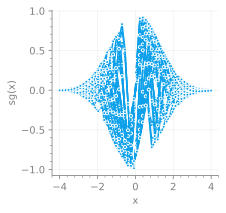

In [10]:
ds.xyz.plot("x", "sg(x)");

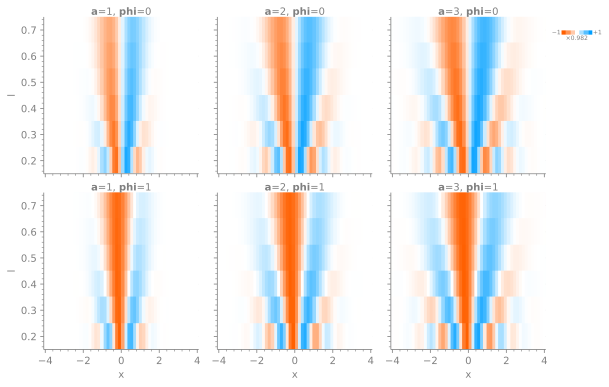

(<Figure size 900x600 with 6 Axes>,
 array([[<Axes: ylabel='l'>, <Axes: >, <Axes: >],
        [<Axes: xlabel='x', ylabel='l'>, <Axes: xlabel='x'>,
         <Axes: xlabel='x'>]], dtype=object))

In [13]:
ds.xyz.plot(x="x", y="l", z="sg(x)", row=["phi"], col="a", palette="RdBu")